In [6]:
!pip install prophet yfinance --quiet

In [7]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [8]:
tickers = ['NVDA', 'AAPL', '^GSPC', 'GOOGL', 'BRK-B', 'MSFT']
results = []


📊 Forecasting: NVDA


[*********************100%***********************]  1 of 1 completed
17:20:52 - cmdstanpy - INFO - Chain [1] start processing
17:20:52 - cmdstanpy - INFO - Chain [1] done processing


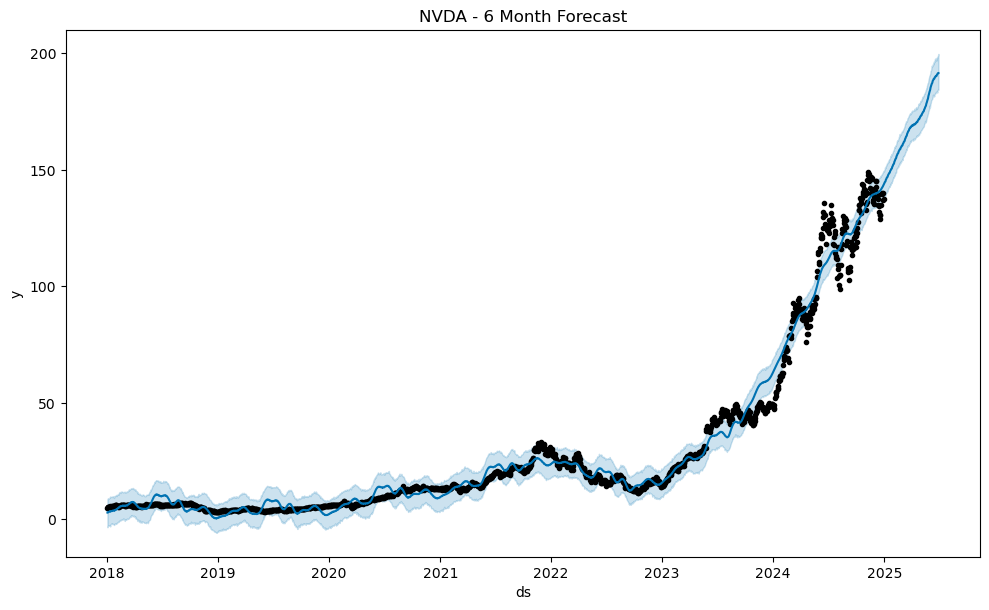

[*********************100%***********************]  1 of 1 completed
17:20:53 - cmdstanpy - INFO - Chain [1] start processing



📊 Forecasting: AAPL


17:20:53 - cmdstanpy - INFO - Chain [1] done processing


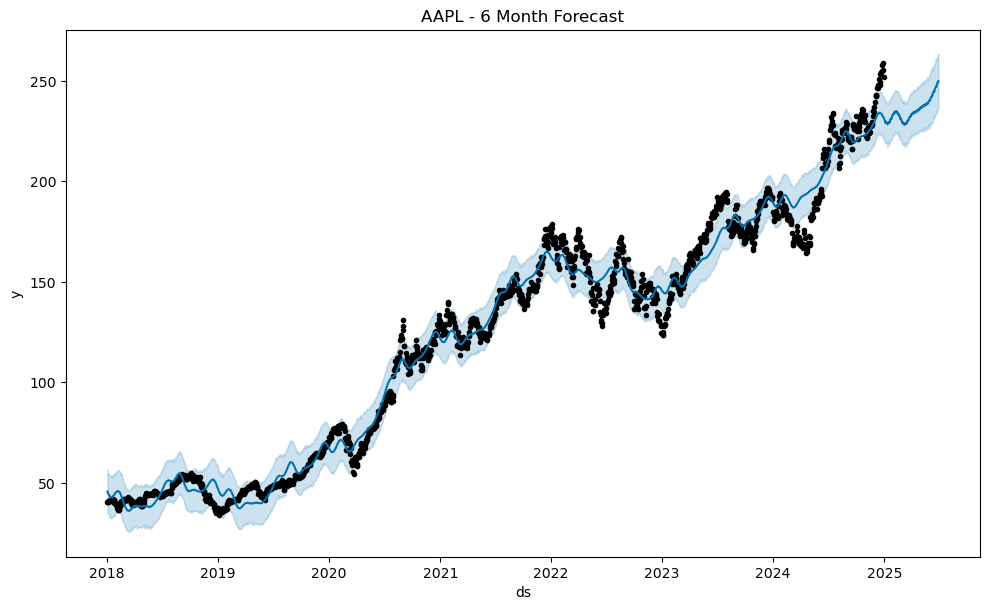


📊 Forecasting: ^GSPC


[*********************100%***********************]  1 of 1 completed
17:20:55 - cmdstanpy - INFO - Chain [1] start processing
17:20:55 - cmdstanpy - INFO - Chain [1] done processing


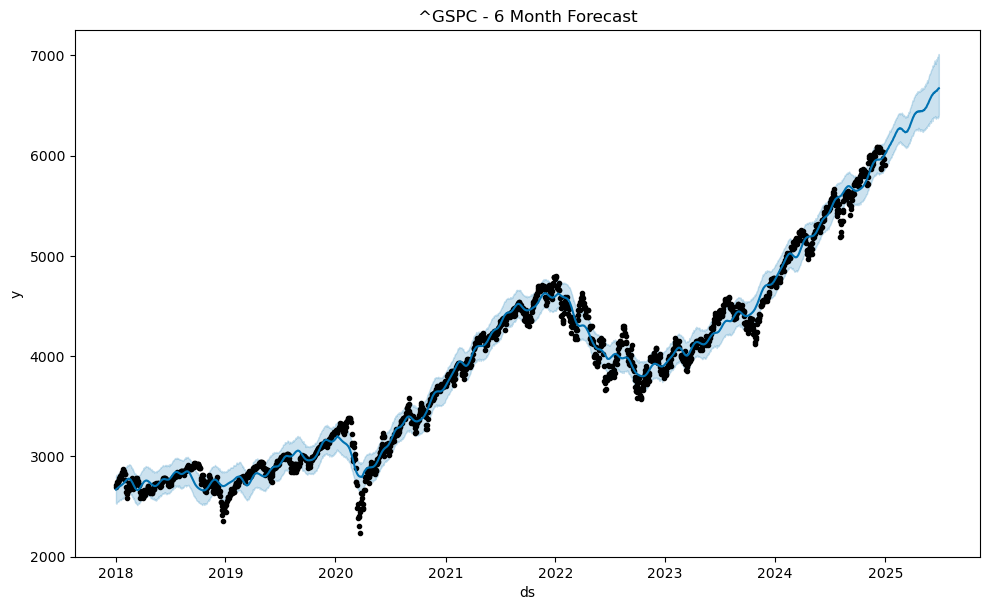


📊 Forecasting: GOOGL


[*********************100%***********************]  1 of 1 completed
17:20:56 - cmdstanpy - INFO - Chain [1] start processing
17:20:56 - cmdstanpy - INFO - Chain [1] done processing


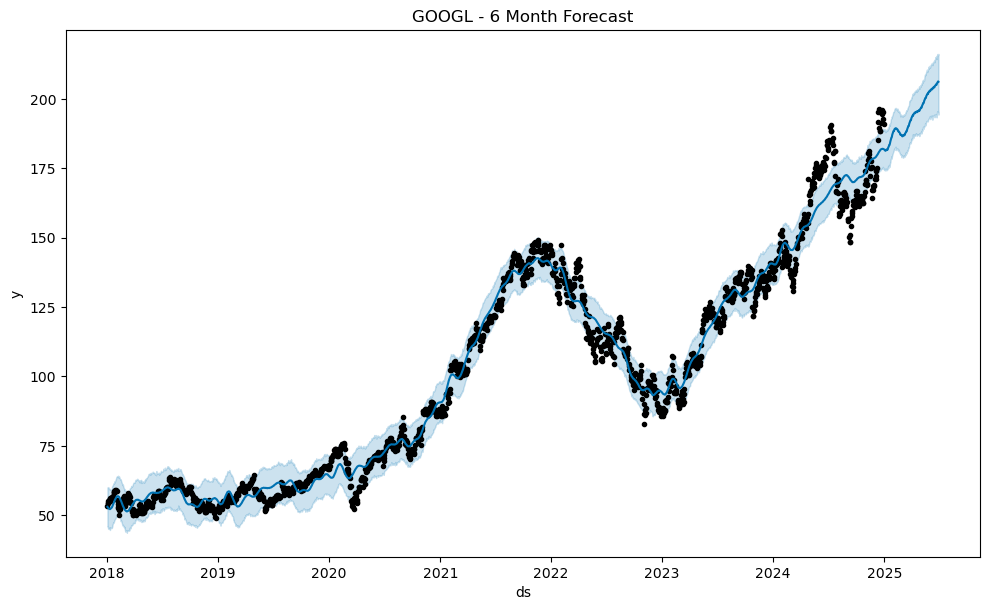


📊 Forecasting: BRK-B


[*********************100%***********************]  1 of 1 completed
17:20:57 - cmdstanpy - INFO - Chain [1] start processing
17:20:58 - cmdstanpy - INFO - Chain [1] done processing


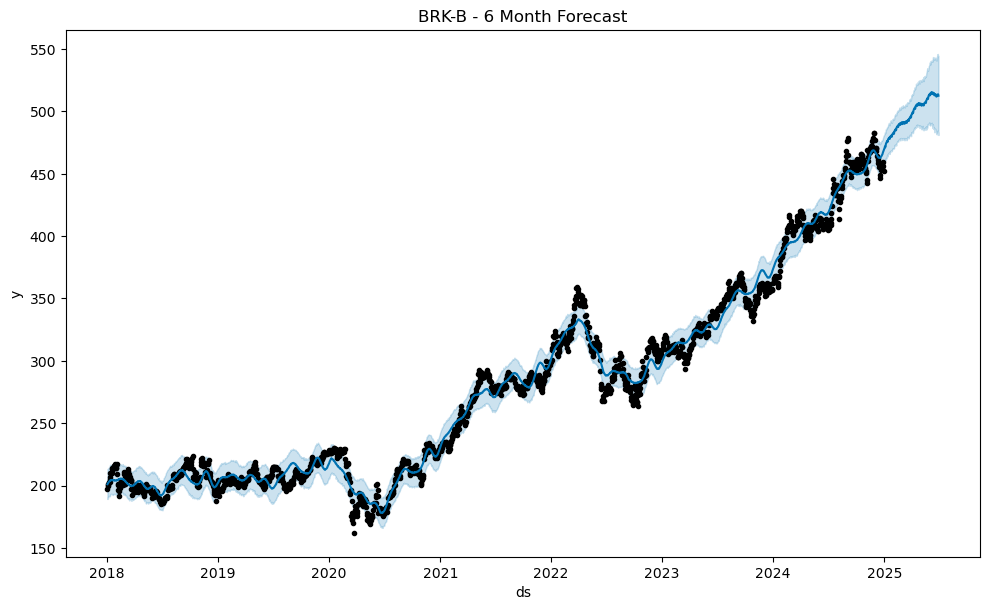


📊 Forecasting: MSFT


[*********************100%***********************]  1 of 1 completed
17:20:59 - cmdstanpy - INFO - Chain [1] start processing
17:20:59 - cmdstanpy - INFO - Chain [1] done processing


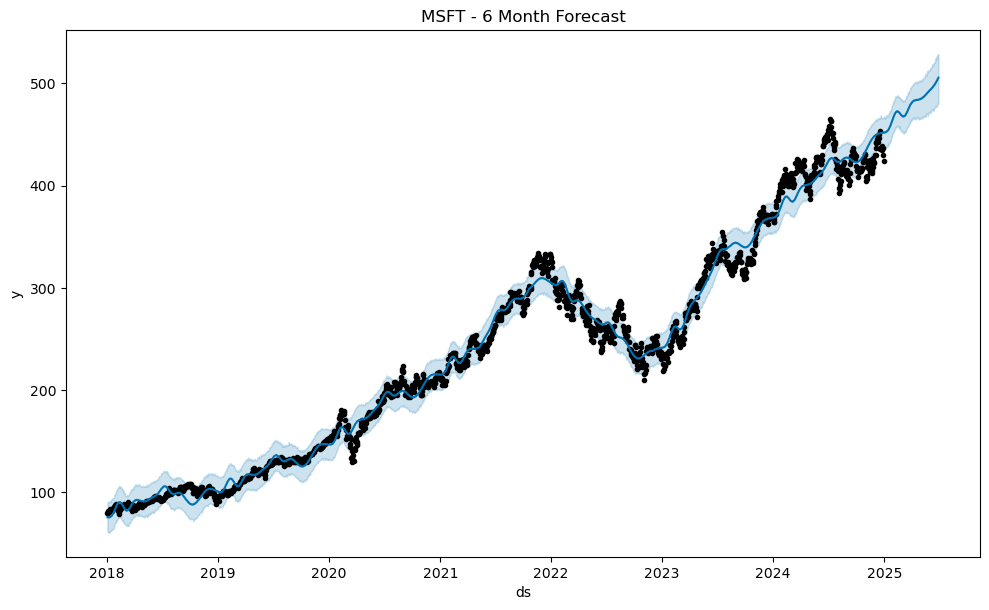

In [9]:
for ticker in tickers:
    print(f"\n📊 Forecasting: {ticker}")
    try:
        # Download historical data
        data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
        df = data[['Close']].reset_index()
        df.columns = ['ds', 'y']

        # Build and train Prophet model
        model = Prophet(daily_seasonality=True)
        model.fit(df)

        # Forecast next 180 days
        future = model.make_future_dataframe(periods=180)
        forecast = model.predict(future)

        # Get current and future predicted price
        current_price = df['y'].iloc[-1]
        predicted_price = forecast['yhat'].iloc[-1]
        growth = (predicted_price - current_price) / current_price * 100

        # Investment decision
        if growth > 10:
            decision = "✅ Strong Buy"
        elif growth > 0:
            decision = "⚠️ Hold"
        else:
            decision = "❌ Avoid"

        # Save result
        results.append([
            ticker,
            round(current_price, 2),
            round(predicted_price, 2),
            round(growth, 2),
            decision
        ])

        # Plot forecast
        model.plot(forecast)
        plt.title(f"{ticker} - 6 Month Forecast")
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")

In [10]:
df_results = pd.DataFrame(results, columns=[
    'Ticker', 'Current Price', '6-Month Forecast', 'Growth (%)', 'Recommendation'
])
df_results

,Ticker,Current Price,6-Month Forecast,Growth (%),Recommendation
0,NVDA,137.48,191.45,39.26,✅ Strong Buy
1,AAPL,251.92,249.73,-0.87,❌ Avoid
2,^GSPC,5906.94,6672.45,12.96,✅ Strong Buy
3,GOOGL,191.02,206.07,7.88,⚠️ Hold
4,BRK-B,452.16,512.57,13.36,✅ Strong Buy
5,MSFT,423.98,505.61,19.25,✅ Strong Buy
